In [1]:
%pip install -q -y seaborn matploblib pandas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("../benchmarks/gpt2_text_generation_20230529.csv")
df = df[df.time > 0]
df = df.sort_values(by=["time"])
df.head()

,model,batch_size,num_tokens,time,sdp_backend,dtype,bettertransformer,gpu,forward_only,prompts,compile,compile_mode,pytorch_version,cuda_version,cudnn_version,cloud
84,gpt2,1,256,518.122620,EFFICIENT_ATTENTION,torch.float16,True,NVIDIA GeForce RTX 3090,True,"[""A chat between a curious human and an artifi...",True,max-autotune,2.1.0.dev20230519+cu121,12.1,8801,LOCAL
90,gpt2,1,256,523.021606,EFFICIENT_ATTENTION,torch.float16,True,NVIDIA GeForce RTX 3090,True,"[""A chat between a curious human and an artifi...",False,NaN,2.1.0.dev20230519+cu121,12.1,8801,LOCAL
102,gpt2,1,256,525.696167,EFFICIENT_ATTENTION,torch.bfloat16,True,NVIDIA GeForce RTX 3090,True,"[""A chat between a curious human and an artifi...",False,NaN,2.1.0.dev20230519+cu121,12.1,8801,LOCAL
96,gpt2,1,256,526.962219,EFFICIENT_ATTENTION,torch.bfloat16,True,NVIDIA GeForce RTX 3090,True,"[""A chat between a curious human and an artifi...",True,max-autotune,2.1.0.dev20230519+cu121,12.1,8801,LOCAL
60,gpt2,1,256,555.037231,FLASH_ATTENTION,torch.float16,True,NVIDIA GeForce RTX 3090,True,"[""A chat between a curious human and an artifi...",True,max-autotune,2.1.0.dev20230519+cu121,12.1,8801,LOCAL


In [23]:
# Group by batch size, model, gpu and sort by time and get top 3
gdf = df.groupby(["batch_size", "model", "gpu", "num_tokens"])

def append_eager_time(x):
    eager_time = x[x["sdp_backend"] == "EAGER"].sort_values(["time"], ascending=True).head(1).time.values[0]
    x["eager_time"] = eager_time
    return x
gdf = gdf.apply(
    append_eager_time
)
gdf["speedup"] = (gdf["eager_time"] - gdf["time"]) / gdf["time"]


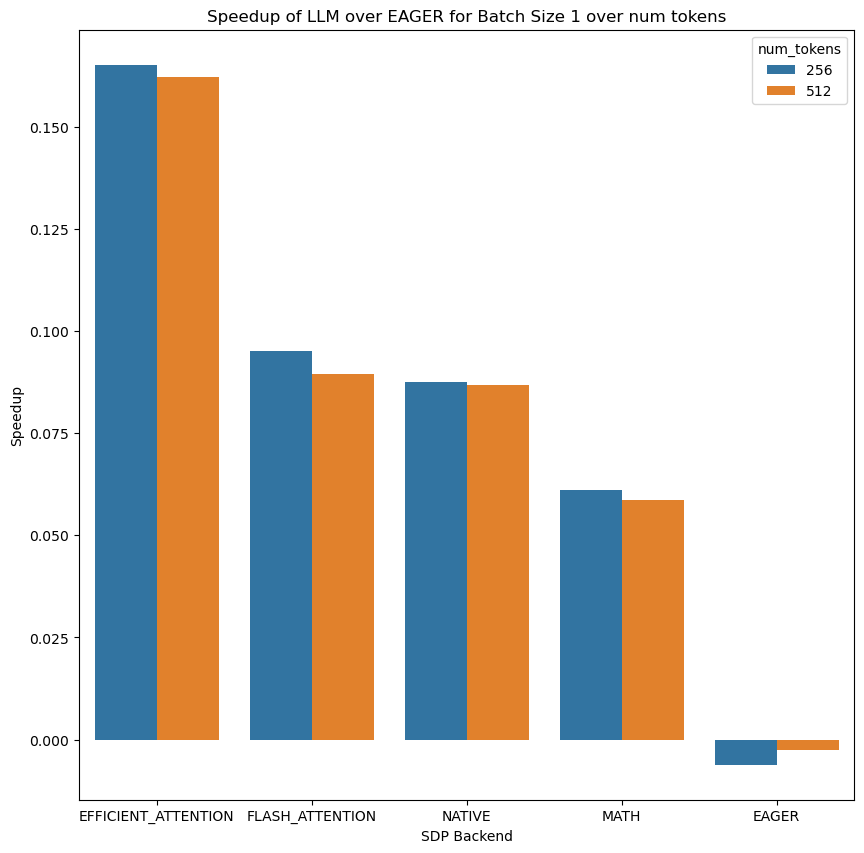

In [24]:
# Generate a bar plot with sdp_backend on x-axis and speedup on y-axis
plt.figure(figsize=(10, 10))
sns.barplot(
    data=gdf[gdf.batch_size == 1],
    x="sdp_backend",
    y="speedup",
    hue="num_tokens",
    errorbar=None,
    capsize=0.1,
).set(title="Speedup of LLM over EAGER for Batch Size 1 over num tokens", xlabel="SDP Backend", ylabel="Speedup")
plt.show()

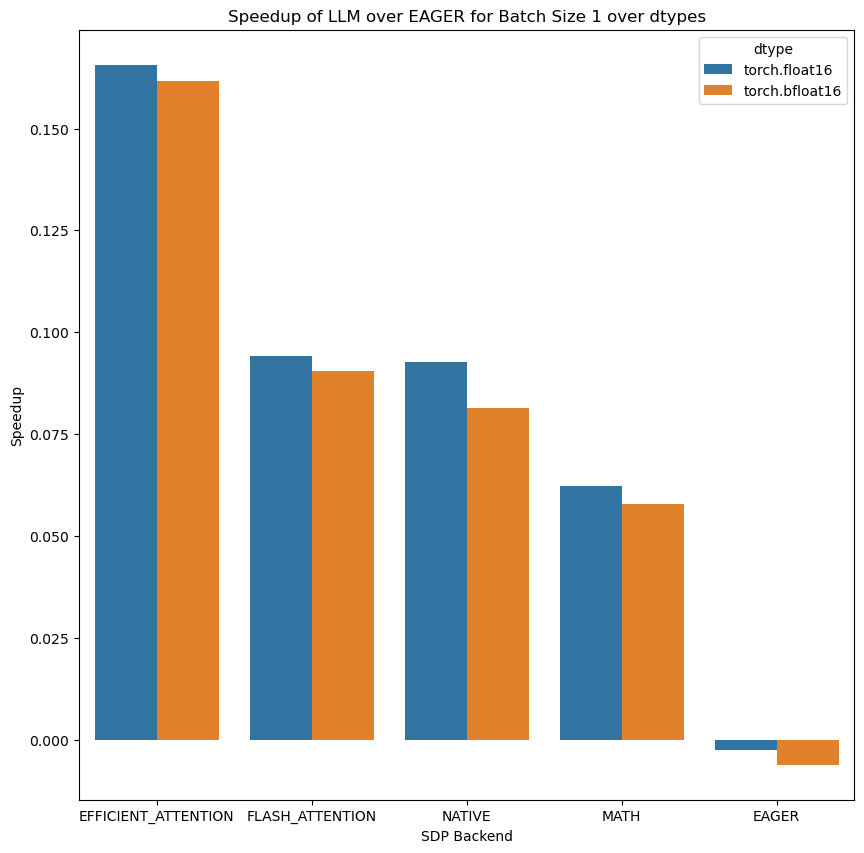

In [25]:
# Generate a bar plot with sdp_backend on x-axis and speedup on y-axis
plt.figure(figsize=(10, 10))
sns.barplot(
    data=gdf[gdf.batch_size == 1],
    x="sdp_backend",
    y="speedup",
    hue="dtype",
    errorbar=None,
    capsize=0.1,
).set(title="Speedup of LLM over EAGER for Batch Size 1 over dtypes", xlabel="SDP Backend", ylabel="Speedup")
plt.show()

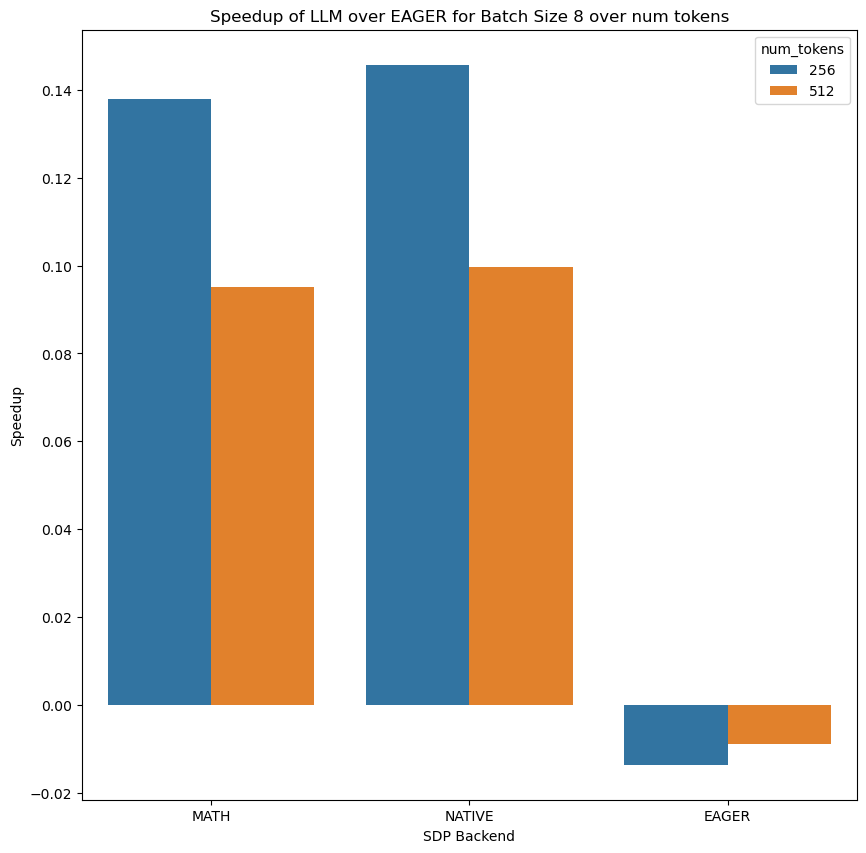

In [26]:
# Generate a bar plot with sdp_backend on x-axis and speedup on y-axis
plt.figure(figsize=(10, 10))
sns.barplot(
    data=gdf[gdf.batch_size == 8],
    x="sdp_backend",
    y="speedup",
    hue="num_tokens",
    errorbar=None,
    capsize=0.1,
).set(title="Speedup of LLM over EAGER for Batch Size 8 over num tokens", xlabel="SDP Backend", ylabel="Speedup")
plt.show()